In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

In [2]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [3]:
# Construction of the 0-pi Hamiltonian

def Hamiltonian_0pi(EJ,ECS,ECJ,EL,n,phi,alph):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    H1=4*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta[0][2*M]+=1
    cos_theta[2*M][0]+=1
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi/2)))
    H_I=EJ*np.kron(cos_theta,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [4]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=50
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

#Qubit parameters 1 

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

# Qubit parameters 2

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
E_J_2=(1.0/5.0)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))

# For calculations ng

ng1=np.arange(0.4,0.61,0.01) #0.005
ng2=np.arange(0.4,0.61,0.01)

# For calculations phiext

a=np.pi-0.6
b=np.pi+0.65
phi_ext1=np.arange(a,b,0.06) #0.6 #0.03
phi_ext2=np.arange(a,b,0.06) #0.6

#2Darrays

PHI,NG=np.meshgrid(phi_ext1,ng1)

Energies1_0=np.zeros_like(NG)
Energies1_1=np.zeros_like(NG)
Energies1_2=np.zeros_like(NG)
Energies1_3=np.zeros_like(NG)

Energies2_0=np.zeros_like(NG)
Energies2_1=np.zeros_like(NG)
Energies2_2=np.zeros_like(NG)
Energies2_3=np.zeros_like(NG)

In [5]:
for i in range(NG.shape[0]):
    for j in range(NG.shape[1]):
        print("i=",i)
        print("j=",j)
        print("Step for ng = ",ng1[i],", phi_ext= ",phi_ext1[j])
        H1=Hamiltonian_0pi(E_J,E_Cs,E_Cj,E_L,ng1[i],phi_ext1[j],alpha)
        print("Hamiltonian built, len(H)=",len(H1)**2)
        #vals,vects=np.linalg.eigh(H)
        vals, _ = eigsh(H1, k=4, which='SA')
        #vals,_=np.linalg.eigh(H)
        print(vals[0],vals[1],vals[2],vals[3])
        print("Eigenvalues calculated")
        Energies1_0[i][j]+=vals[0]
        print("Energies1_0[",i,"][",j,"] = ",Energies1_0[i][j])
        Energies1_1[i][j]+=vals[1]
        print("Energies1_1[",i,"][",j,"] = ",Energies1_1[i][j])
        Energies1_2[i][j]+=vals[2]
        print("Energies1_2[",i,"][",j,"] = ",Energies1_2[i][j])
        Energies1_3[i][j]+=vals[3]
        print("Energies1_3[",i,"][",j,"] = ",Energies1_3[i][j])

i= 0
j= 0
Step for ng =  0.4 , phi_ext=  2.541592653589793
Hamiltonian built, len(H)= 4372281
1.4244141161681323 2.1729853974836626 3.7116749080065636 4.3222424638732475
Eigenvalues calculated
Energies1_0[ 0 ][ 0 ] =  1.4244141161681323
Energies1_1[ 0 ][ 0 ] =  2.1729853974836626
Energies1_2[ 0 ][ 0 ] =  3.7116749080065636
Energies1_3[ 0 ][ 0 ] =  4.3222424638732475
i= 0
j= 1
Step for ng =  0.4 , phi_ext=  2.601592653589793
Hamiltonian built, len(H)= 4372281
1.4300820068409124 2.1636322940166046 3.713703620276992 4.321988368292913
Eigenvalues calculated
Energies1_0[ 0 ][ 1 ] =  1.4300820068409124
Energies1_1[ 0 ][ 1 ] =  2.1636322940166046
Energies1_2[ 0 ][ 1 ] =  3.713703620276992
Energies1_3[ 0 ][ 1 ] =  4.321988368292913
i= 0
j= 2
Step for ng =  0.4 , phi_ext=  2.661592653589793
Hamiltonian built, len(H)= 4372281
1.4353218149461917 2.155076156278036 3.7155261711047918 4.321756851147349
Eigenvalues calculated
Energies1_0[ 0 ][ 2 ] =  1.4353218149461917
Energies1_1[ 0 ][ 2 ] =  2.1550

In [6]:
for i in range(NG.shape[0]):
    for j in range(NG.shape[1]):
        print("Step for ng = ",ng2[i],", phi_ext= ",phi_ext2[j])
        H2=Hamiltonian_0pi(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng2[i],phi_ext2[j],alpha2)
        print("Hamiltonian built, len(H)=",len(H2)**2)
        #vals,vects=np.linalg.eigh(H)
        vals2, _ = eigsh(H2, k=4, which='SA')
        #vals,_=np.linalg.eigh(H)
        print(vals2[0],vals2[1],vals2[2],vals2[3])
        print("Eigenvalues calculated")
        Energies2_0[i][j]+=vals2[0]
        print("Energies2_0[",i,"][",j,"] = ",Energies2_0[i][j])
        Energies2_1[i][j]+=vals2[1]
        print("Energies2_1[",i,"][",j,"] = ",Energies2_1[i][j])
        Energies2_2[i][j]+=vals2[2]
        print("Energies2_2[",i,"][",j,"] = ",Energies2_2[i][j])
        Energies2_3[i][j]+=vals2[3]
        print("Energies2_3[",i,"][",j,"] = ",Energies2_3[i][j])

Step for ng =  0.4 , phi_ext=  2.541592653589793
Hamiltonian built, len(H)= 4372281
0.2561289978089588 0.29841769570666027 0.608014113345496 0.7137156109654024
Eigenvalues calculated
Energies2_0[ 0 ][ 0 ] =  0.2561289978089588
Energies2_1[ 0 ][ 0 ] =  0.29841769570666027
Energies2_2[ 0 ][ 0 ] =  0.608014113345496
Energies2_3[ 0 ][ 0 ] =  0.7137156109654024
Step for ng =  0.4 , phi_ext=  2.601592653589793
Hamiltonian built, len(H)= 4372281
0.2563839727332803 0.29808174843473395 0.6078683553470018 0.7137327185044965
Eigenvalues calculated
Energies2_0[ 0 ][ 1 ] =  0.2563839727332803
Energies2_1[ 0 ][ 1 ] =  0.29808174843473395
Energies2_2[ 0 ][ 1 ] =  0.6078683553470018
Energies2_3[ 0 ][ 1 ] =  0.7137327185044965
Step for ng =  0.4 , phi_ext=  2.661592653589793
Hamiltonian built, len(H)= 4372281
0.2566180997183454 0.2977744232036521 0.6077378850881572 0.7137432622569975
Eigenvalues calculated
Energies2_0[ 0 ][ 2 ] =  0.2566180997183454
Energies2_1[ 0 ][ 2 ] =  0.2977744232036521
Energies2

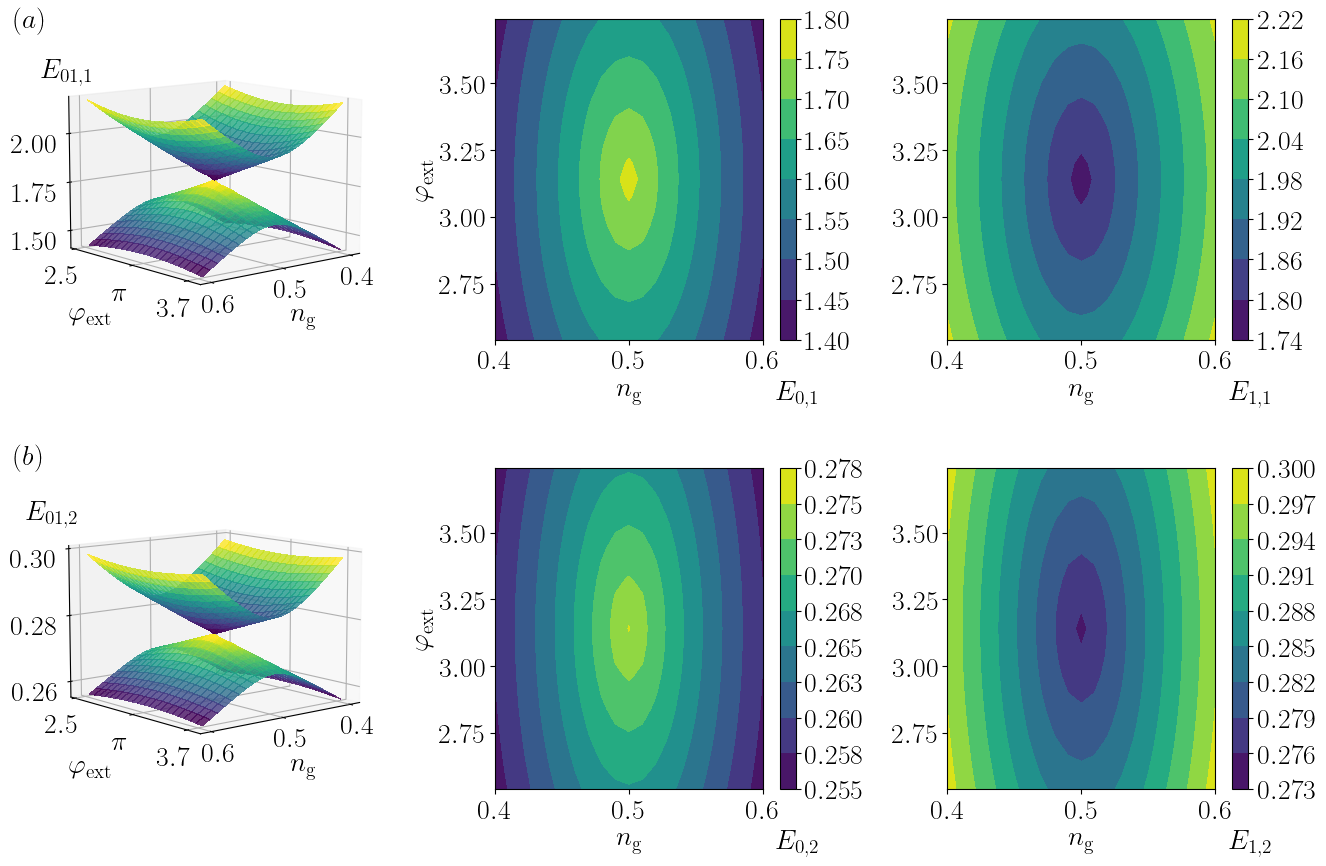

In [87]:
# Create the figure and subplots
fig = plt.figure(figsize=(16, 10))

# Plot 1: 3D surface plot
ax1 = fig.add_subplot(231, projection='3d')
surf1 = ax1.plot_surface(NG, PHI, Energies1_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surf2 = ax1.plot_surface(NG,PHI, Energies1_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax1.set_xlabel('$n_g$')
#ax1.set_ylabel(r'$\varphi_{ext}$')
#ax1.set_zlabel('$E_{01} (1)$')
ax1.text(0.6,2,2.25,r'$E_{01,1}$', fontsize=20)
ax1.text(0.47,3.7,1.1,r'$n_{\rm g}$', fontsize=20)
ax1.text(0.7,3.15,1.2,r'$\varphi_{\rm ext}$', fontsize=20)
ax1.set_xticks([0.4,0.5,0.6],['$0.4$','$0.5$','$0.6$'])
ax1.set_yticks([2.5,np.pi,3.7],['$2.5$','$\pi$','$3.7$'])
ax1.tick_params(axis='x', pad=-2.0)
ax1.tick_params(axis='y', pad=2.0)
ax1.tick_params(axis='z', pad=7.0)
ax1.text(0.635,2,2.52,r'$(a)$', fontsize=20)
ax1.view_init(10, 50)

# Plot 2: First contour plot
ax2 = fig.add_subplot(232)
contour1 = ax2.contourf(NG, PHI, Energies1_0, cmap="viridis")
plt.axis('tight')
ax2.set_xlabel(r'$n_{\rm g}$')
ax2.set_ylabel(r'$\varphi_{\rm ext}$')
ax2.text(0.61,2.32,r'$E_{0,1}$', fontsize=20)
#ax2.text(0.34,3.79,r'$(b)$', fontsize=20)
colorbar1 = plt.colorbar(contour1, ax=ax2)
#colorbar1.set_label('$E_0 (1)$')

# Plot 3: Second contour plot
ax3 = fig.add_subplot(233)
contour2 = ax3.contourf(NG, PHI, Energies1_1, cmap="viridis")
plt.axis('tight')
ax3.set_xlabel(r'$n_{\rm g}$')
#ax3.set_ylabel(r'$\varphi_{ext}$')
ax3.text(0.61,2.32,r'$E_{1,1}$', fontsize=20)
#ax3.text(0.34,3.79,r'$(c)$', fontsize=20)
colorbar2 = plt.colorbar(contour2, ax=ax3)
#colorbar2.set_label('$E_1 (1)$')

# Plot 1: 3D surface plot
ax11 = fig.add_subplot(234, projection='3d')
surf11 = ax11.plot_surface(NG, PHI, Energies2_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surf21 = ax11.plot_surface(NG,PHI, Energies2_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax1.set_xlabel('$n_g$')
#ax1.set_ylabel(r'$\varphi_{ext}$')
#ax1.set_zlabel('$E_{01} (1)$')
ax11.text(0.62,2,0.307,r'$E_{01,2}$', fontsize=20)
ax11.text(0.47,3.7,0.237,r'$n_{\rm g}$', fontsize=20)
ax11.text(0.7,3.15,0.242,r'$\varphi_{\rm ext}$', fontsize=20)
ax11.set_xticks([0.4,0.5,0.6],['$0.4$','$0.5$','$0.6$'])
ax11.set_yticks([2.5,np.pi,3.7],['$2.5$','$\pi$','$3.7$'])
ax11.set_zticks([0.26,0.28,0.30],['$0.26$','$0.28$','$0.30$'])
ax11.tick_params(axis='x', pad=-2.0)
ax11.tick_params(axis='y', pad=2.0)
ax11.tick_params(axis='z', pad=7.0)
ax11.text(0.69,2.5,0.326,r'$(b)$', fontsize=20)
ax11.view_init(10, 50)

# Plot 2: First contour plot
ax22 = fig.add_subplot(235)
contour12 = ax22.contourf(NG, PHI, Energies2_0, cmap="viridis")
plt.axis('tight')
ax22.set_xlabel(r'$n_{\rm g}$')
ax22.set_ylabel(r'$\varphi_{\rm ext}$')
ax22.text(0.61,2.32,r'$E_{0,2}$', fontsize=20)
#ax22.text(0.34,3.79,r'$(b)$', fontsize=20)
colorbar12 = plt.colorbar(contour12, ax=ax22)
#colorbar1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))  # Set 2 decimal places
colorbar12.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.3f$'))

#colorbar1.set_label('$E_0 (2)$')

# Plot 3: Second contour plot
ax33 = fig.add_subplot(236)
contour23 = ax33.contourf(NG, PHI, Energies2_1, cmap="viridis")
plt.axis('tight')
ax33.set_xlabel(r'$n_{\rm g}$')
#ax33.set_ylabel(r'$\varphi_{ext}$')
ax33.text(0.61,2.32,r'$E_{1,2}$', fontsize=20)
#ax33.text(0.34,3.79,r'$(c)$', fontsize=20)
colorbar23 = plt.colorbar(contour23, ax=ax33)
#colorbar2.set_label('$E_1 (2)$')

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.35, hspace=0.4)

# Show the figure
#plt.savefig('E01_1&2all_DEF_M20N50.png',dpi=300,bbox_inches='tight')
plt.show()

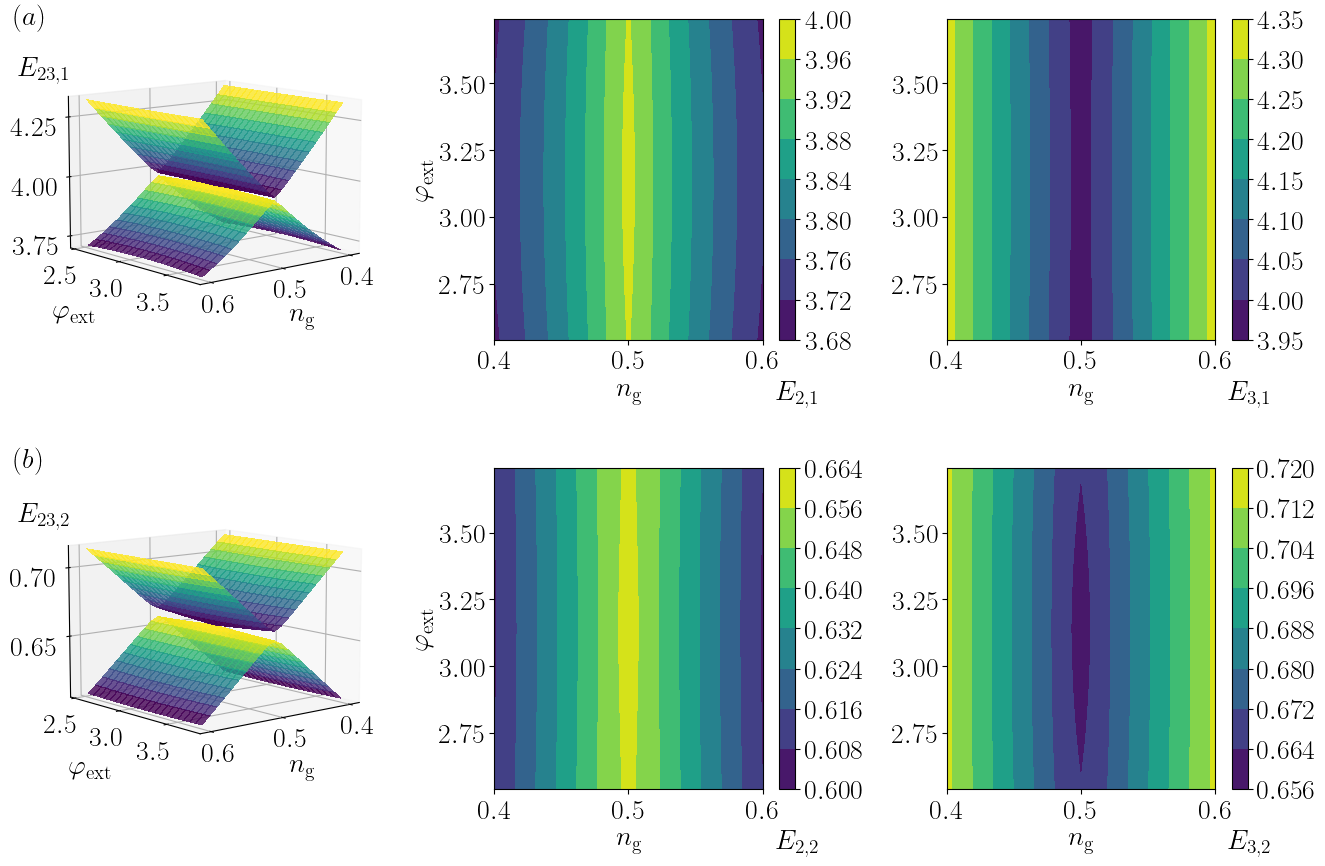

In [88]:
# Create the figure and subplots
fig3 = plt.figure(figsize=(16, 10))
# Plot 1: 3D surface plot
ax1 = fig3.add_subplot(231, projection='3d')
surf1 = ax1.plot_surface(NG, PHI, Energies1_2, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surf2 = ax1.plot_surface(NG,PHI, Energies1_3, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax1.set_xlabel('$n_g$')
#ax1.set_ylabel(r'$\varphi_{ext}$')
#ax1.set_zlabel('$E_{01} (1)$')
ax1.text(0.63,2,4.40,r'$E_{23,1}$', fontsize=20)
ax1.text(0.47,3.7,3.45,r'$n_{\rm g}$', fontsize=20)
ax1.text(0.72,3.15,3.55,r'$\varphi_{\rm ext}$', fontsize=20)
#ax1.set_xticks([0.4,0.5,0.6],['$0.4$','$0.5$','$0.6$'])
#ax1.set_yticks([2.5,np.pi,3.7],['$2.5$','$\pi$','$3.7$'])
#ax1.set_zticks([0.65,0.70],['$0.65$','$0.70$'])
ax1.tick_params(axis='x', pad=-2.0)
ax1.tick_params(axis='y', pad=2.0)
ax1.tick_params(axis='z', pad=7.0)
ax1.text(0.69,2.5,4.65,r'$(a)$', fontsize=20)
ax1.view_init(10, 50)

# Plot 2: First contour plot
ax2 = fig3.add_subplot(232)
contour1 = ax2.contourf(NG, PHI, Energies1_2, cmap="viridis")
plt.axis('tight')
ax2.set_xlabel(r'$n_{\rm g}$')
ax2.set_ylabel(r'$\varphi_{\rm ext}$')
ax2.text(0.61,2.32,r'$E_{2,1}$', fontsize=20)
#ax2.text(0.34,3.79,r'$(b)$', fontsize=20)
colorbar1 = plt.colorbar(contour1, ax=ax2)
#colorbar1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))  # Set 2 decimal places
colorbar1.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.2f$'))

#colorbar1.set_label('$E_2 (1)$')

# Plot 3: Second contour plot
ax3 = fig3.add_subplot(233)
contour2 = ax3.contourf(NG, PHI, Energies1_3, cmap="viridis")
plt.axis('tight')
ax3.set_xlabel(r'$n_{\rm g}$')
#ax3.set_ylabel(r'$\varphi_{\rm ext}$')
ax3.text(0.61,2.32,r'$E_{3,1}$', fontsize=20)
#ax3.text(0.34,3.79,r'$(c)$', fontsize=20)
colorbar2 = plt.colorbar(contour2, ax=ax3)
#colorbar2.set_label('$E_3 (1)$')

# Plot 1: 3D surface plot
ax11 = fig3.add_subplot(234, projection='3d')
surf11 = ax11.plot_surface(NG, PHI, Energies2_2, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surf21 = ax11.plot_surface(NG,PHI, Energies2_3, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax1.set_xlabel('$n_g$')
#ax1.set_ylabel(r'$\varphi_{ext}$')
#ax1.set_zlabel('$E_{01} (1)$')
ax11.text(0.63,2,0.73,r'$E_{23,2}$', fontsize=20)
ax11.text(0.47,3.7,0.56,r'$n_{\rm g}$', fontsize=20)
ax11.text(0.7,3.15,0.572,r'$\varphi_{\rm ext}$', fontsize=20)
#ax1.set_xticks([0.4,0.5,0.6],['$0.4$','$0.5$','$0.6$'])
#ax1.set_yticks([2.5,np.pi,3.7],['$2.5$','$\pi$','$3.7$'])
ax11.set_zticks([0.65,0.70],['$0.65$','$0.70$'])
ax11.tick_params(axis='x', pad=-2.0)
ax11.tick_params(axis='y', pad=2.0)
ax11.tick_params(axis='z', pad=7.0)
ax11.text(0.69,2.5,0.775,r'$(b)$', fontsize=20)
ax11.view_init(10, 50)

# Plot 2: First contour plot
ax22 = fig3.add_subplot(235)
contour12 = ax22.contourf(NG, PHI, Energies2_2, cmap="viridis")
plt.axis('tight')
ax22.set_xlabel(r'$n_{\rm g}$')
ax22.set_ylabel(r'$\varphi_{\rm ext}$')
ax22.text(0.61,2.32,r'$E_{2,2}$', fontsize=20)
#ax22.text(0.34,3.79,r'$(b)$', fontsize=20)
colorbar12 = plt.colorbar(contour12, ax=ax22)
#colorbar1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))  # Set 2 decimal places
colorbar12.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.3f$'))

#colorbar1.set_label('$E_2 (2)$')

# Plot 3: Second contour plot
ax33 = fig3.add_subplot(236)
contour23 = ax33.contourf(NG, PHI, Energies2_3, cmap="viridis")
plt.axis('tight')
ax33.set_xlabel(r'$n_{\rm g}$')
#ax33.set_ylabel(r'$\varphi_{\rm ext}$')
ax33.text(0.61,2.32,r'$E_{3,2}$', fontsize=20)
#ax33.text(0.34,3.79,r'$(c)$', fontsize=20)
colorbar23 = plt.colorbar(contour23, ax=ax33)
#colorbar2.set_label('$E_1 (2)$')

# Adjust the spacing between subplots
fig3.subplots_adjust(wspace=0.35, hspace = 0.4)

# Show the figure
#plt.savefig('E23_1&2all_DEF_M20N50.png',dpi=300,bbox_inches='tight')
plt.show()

GROUND STATE & 1ST EXCITED STATE JOINT 3D PLOT AND SEPARATED COLORMAPS (1)

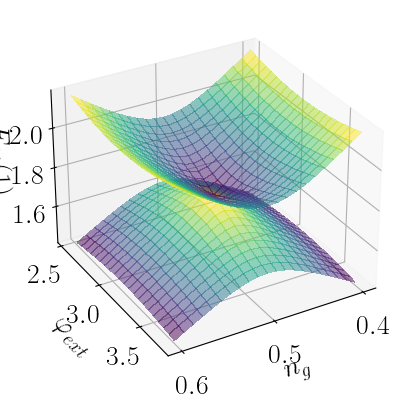

In [ ]:
fig01 = plt.figure()
ax01 = plt.axes(projection='3d')
ax01.plot_surface(NG,PHI, Energies1_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.5)#changing x and y 
ax01.plot_surface(NG,PHI, Energies1_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.5)
ax01.set_xlabel('$n_g$')
ax01.set_ylabel(r'$\varphi_{ext}$')
ax01.set_zlabel('$E_{01} (1)$')
# rotation
ax01.view_init(30, 60)
#plt.savefig('3D_E01_N20M20.pdf',dpi=600)
plt.show()

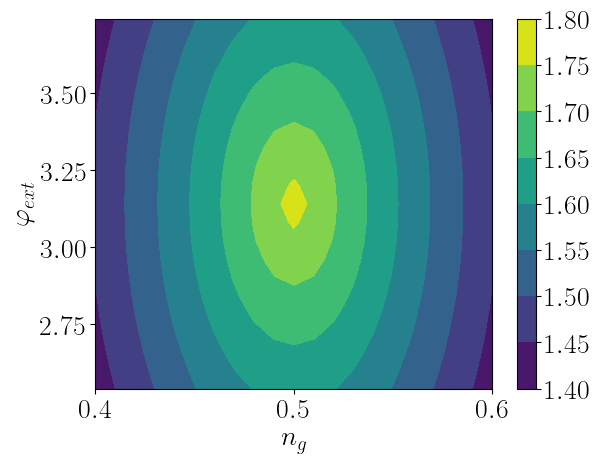

In [ ]:
fig0=plt.figure()
plt.contourf(NG,PHI, Energies1_0, cmap="viridis")
plt.axis('auto')
plt.xlabel("$n_g$")
plt.ylabel(r'$\varphi_{ext}$')
plt.colorbar()
#plt.savefig('COLORMAP_E0_N20M20.pdf')
plt.show()

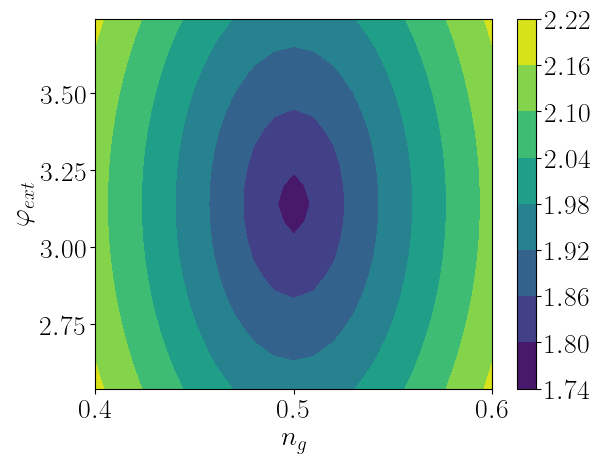

In [ ]:
fig1=plt.figure()
plt.contourf(NG,PHI, Energies1_1, cmap="viridis")
plt.axis('auto')
plt.xlabel("$n_g$")
plt.ylabel(r'$\varphi_{ext}$')
plt.colorbar()
#plt.savefig('COLORMAP_E1_N20M20.pdf')
plt.show()

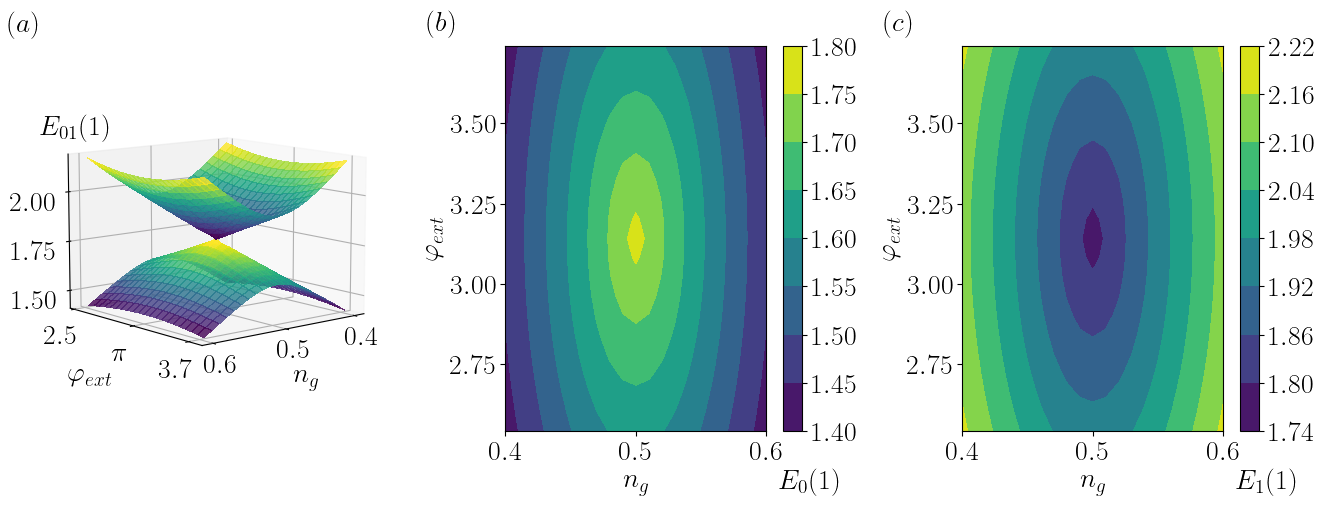

In [ ]:
# Create the figure and subplots
fig = plt.figure(figsize=(16, 5))

# Plot 1: 3D surface plot
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(NG, PHI, Energies1_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surf2 = ax1.plot_surface(NG,PHI, Energies1_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax1.set_xlabel('$n_g$')
#ax1.set_ylabel(r'$\varphi_{ext}$')
#ax1.set_zlabel('$E_{01} (1)$')
ax1.text(0.6,2,2.25,r'$E_{01} (1)$', fontsize=20)
ax1.text(0.47,3.7,1.1,r'$n_g$', fontsize=20)
ax1.text(0.7,3.15,1.2,r'$\varphi_{ext}$', fontsize=20)
ax1.set_xticks([0.4,0.5,0.6],['$0.4$','$0.5$','$0.6$'])
ax1.set_yticks([2.5,np.pi,3.7],['$2.5$','$\pi$','$3.7$'])
ax1.tick_params(axis='x', pad=-2.0)
ax1.tick_params(axis='y', pad=2.0)
ax1.tick_params(axis='z', pad=7.0)
ax1.text(0.64,2,2.78,r'$(a)$', fontsize=20)
ax1.view_init(10, 50)

# Plot 2: First contour plot
ax2 = fig.add_subplot(132)
contour1 = ax2.contourf(NG, PHI, Energies1_0, cmap="viridis")
plt.axis('tight')
ax2.set_xlabel(r'$n_g$')
ax2.set_ylabel(r'$\varphi_{ext}$')
ax2.text(0.61,2.36,r'$E_0 (1)$', fontsize=20)
ax2.text(0.34,3.79,r'$(b)$', fontsize=20)
colorbar1 = plt.colorbar(contour1, ax=ax2)
#colorbar1.set_label('$E_0 (1)$')

# Plot 3: Second contour plot
ax3 = fig.add_subplot(133)
contour2 = ax3.contourf(NG, PHI, Energies1_1, cmap="viridis")
plt.axis('tight')
ax3.set_xlabel('$n_g$')
ax3.set_ylabel(r'$\varphi_{ext}$')
ax3.text(0.61,2.36,r'$E_1 (1)$', fontsize=20)
ax3.text(0.34,3.79,r'$(c)$', fontsize=20)
colorbar2 = plt.colorbar(contour2, ax=ax3)
#colorbar2.set_label('$E_1 (1)$')

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.4)

# Show the figure
#plt.savefig('E01_1_DEF_PRUEBA1.png',dpi=300,bbox_inches='tight')
plt.show()

2ND EXCITED STATE & 3RD EXCITED STATE JOINT 3D PLOT AND SEPARATED COLORMAPS (1)

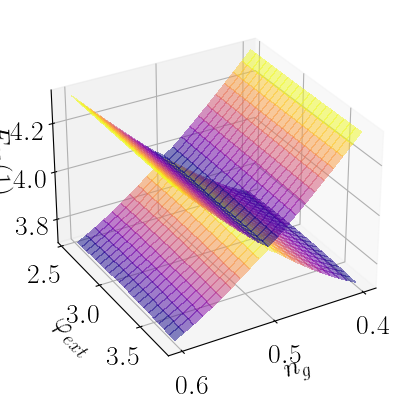

In [ ]:
fig23 = plt.figure()
ax23 = plt.axes(projection='3d')
ax23.plot_surface(NG,PHI,Energies1_2, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)#changing x and y 
ax23.plot_surface(NG,PHI, Energies1_3, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)
ax23.set_xlabel('$n_g$')
ax23.set_ylabel(r'$\varphi_{ext}$')
ax23.set_zlabel('$E_{23} (1)$')
# rotation
ax23.view_init(30, 60)
#plt.savefig('3D_E23_N20M20.pdf',dpi=600)
plt.show()

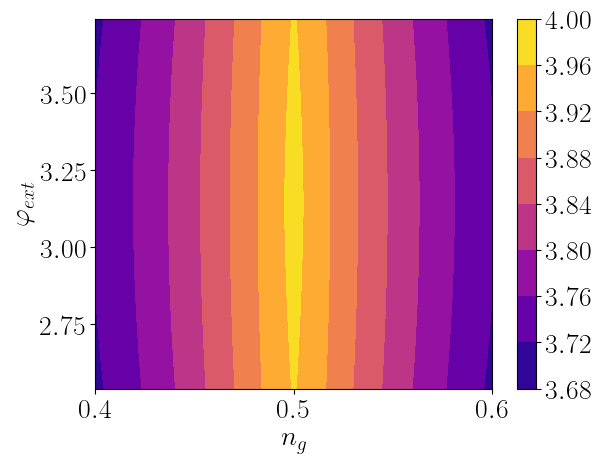

In [ ]:
fig2=plt.figure()
plt.contourf(NG,PHI, Energies1_2, cmap="plasma")
plt.axis('auto')
plt.xlabel("$n_g$")
plt.ylabel(r'$\varphi_{ext}$')
plt.colorbar()
#plt.savefig('COLORMAP_E2_N20M20.pdf')
plt.show()

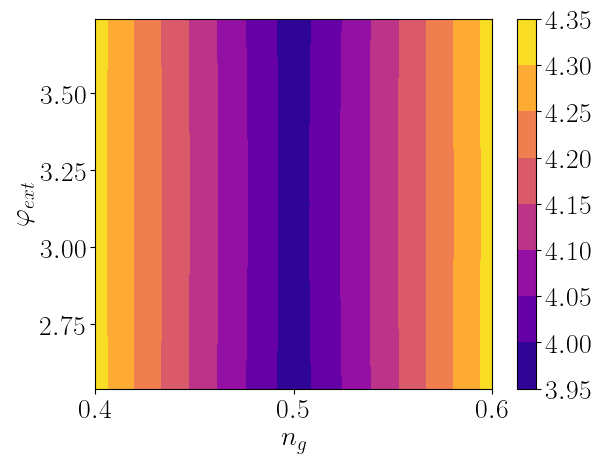

In [ ]:
fig3=plt.figure()
plt.contourf(NG,PHI, Energies1_3, cmap="plasma")
plt.axis('auto')
plt.xlabel("$n_g$")
plt.ylabel(r'$\varphi_{ext}$')
plt.colorbar()
#plt.savefig('COLORMAP_E3_N20M20.pdf')
plt.show()

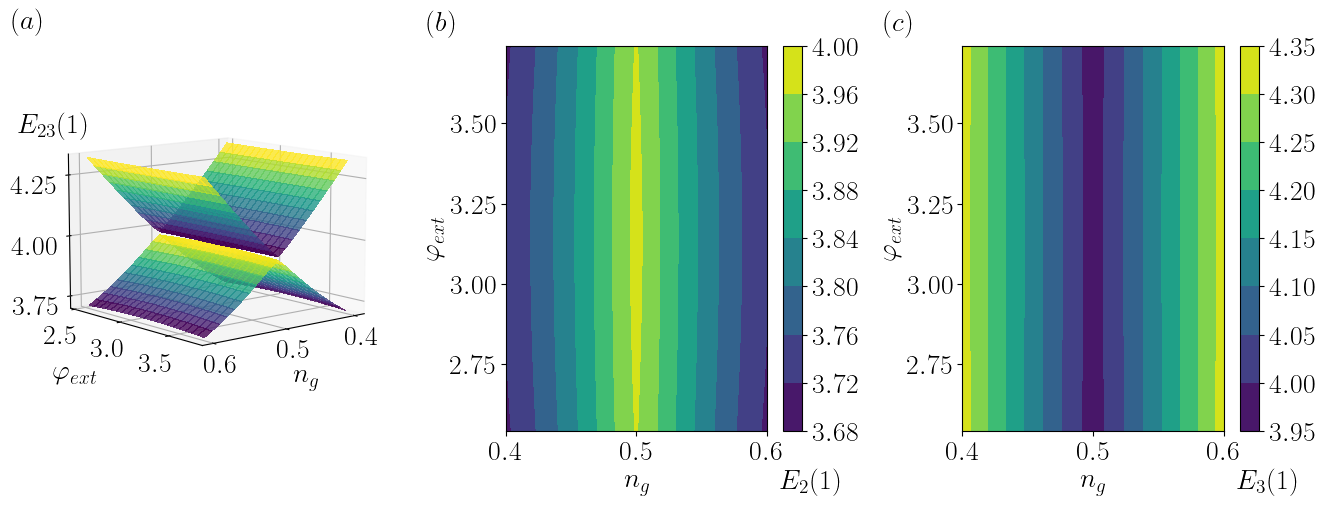

In [ ]:
# Create the figure and subplots
fig3 = plt.figure(figsize=(16, 5))
# Plot 1: 3D surface plot
ax1 = fig3.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(NG, PHI, Energies1_2, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surf2 = ax1.plot_surface(NG,PHI, Energies1_3, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax1.set_xlabel('$n_g$')
#ax1.set_ylabel(r'$\varphi_{ext}$')
#ax1.set_zlabel('$E_{01} (1)$')
ax1.text(0.63,2,4.40,r'$E_{23} (1)$', fontsize=20)
ax1.text(0.47,3.7,3.45,r'$n_g$', fontsize=20)
ax1.text(0.72,3.15,3.55,r'$\varphi_{ext}$', fontsize=20)
#ax1.set_xticks([0.4,0.5,0.6],['$0.4$','$0.5$','$0.6$'])
#ax1.set_yticks([2.5,np.pi,3.7],['$2.5$','$\pi$','$3.7$'])
#ax1.set_zticks([0.65,0.70],['$0.65$','$0.70$'])
ax1.tick_params(axis='x', pad=-2.0)
ax1.tick_params(axis='y', pad=2.0)
ax1.tick_params(axis='z', pad=7.0)
ax1.text(0.69,2.5,4.85,r'$(a)$', fontsize=20)
ax1.view_init(10, 50)

# Plot 2: First contour plot
ax2 = fig3.add_subplot(132)
contour1 = ax2.contourf(NG, PHI, Energies1_2, cmap="viridis")
plt.axis('tight')
ax2.set_xlabel(r'$n_g$')
ax2.set_ylabel(r'$\varphi_{ext}$')
ax2.text(0.61,2.36,r'$E_2 (1)$', fontsize=20)
ax2.text(0.34,3.79,r'$(b)$', fontsize=20)
colorbar1 = plt.colorbar(contour1, ax=ax2)
#colorbar1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))  # Set 2 decimal places
colorbar1.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.2f$'))

#colorbar1.set_label('$E_2 (1)$')

# Plot 3: Second contour plot
ax3 = fig3.add_subplot(133)
contour2 = ax3.contourf(NG, PHI, Energies1_3, cmap="viridis")
plt.axis('tight')
ax3.set_xlabel('$n_g$')
ax3.set_ylabel(r'$\varphi_{ext}$')
ax3.text(0.61,2.36,r'$E_3 (1)$', fontsize=20)
ax3.text(0.34,3.79,r'$(c)$', fontsize=20)
colorbar2 = plt.colorbar(contour2, ax=ax3)
#colorbar2.set_label('$E_3 (1)$')

# Adjust the spacing between subplots
fig3.subplots_adjust(wspace=0.4)

# Show the figure
#plt.savefig('E23_1_DEF_PRUEBA1.png',dpi=300,bbox_inches='tight')
plt.show()

GROUND STATE & 1ST EXCITED STATE JOINT 3D PLOT AND SEPARATED COLORMAPS (1)

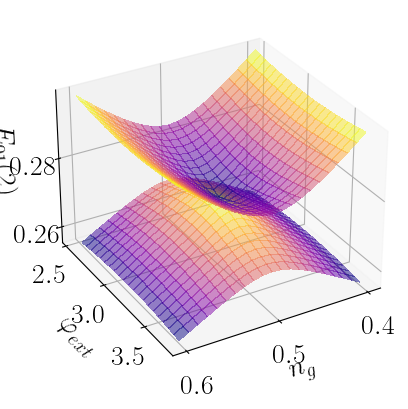

In [ ]:
fig01_2 = plt.figure()
ax01_2 = plt.axes(projection='3d')
ax01_2.plot_surface(NG,PHI, Energies2_0, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)#changing x and y 
ax01_2.plot_surface(NG,PHI,Energies2_1, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)
ax01_2.set_xlabel('$n_g$')
ax01_2.set_ylabel(r'$\varphi_{ext}$')
ax01_2.set_zlabel('$E_{01} (2)$')
# rotation
ax01_2.view_init(30, 60)
#plt.savefig('3D_E01_N20M20_2.pdf',dpi=600)
plt.show()

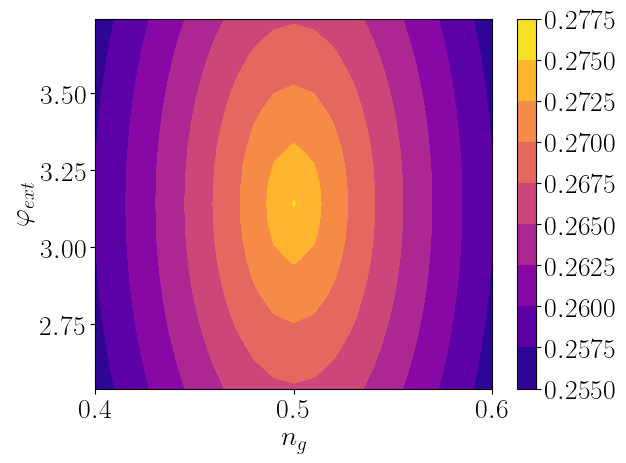

In [ ]:
fig0_2=plt.figure()
plt.contourf(NG,PHI, Energies2_0, cmap="plasma")
plt.axis('auto')
plt.xlabel("$n_g$")
plt.ylabel(r'$\varphi_{ext}$')
plt.colorbar()
#plt.savefig('COLORMAP_E0_N20M20_2.pdf')
plt.show()

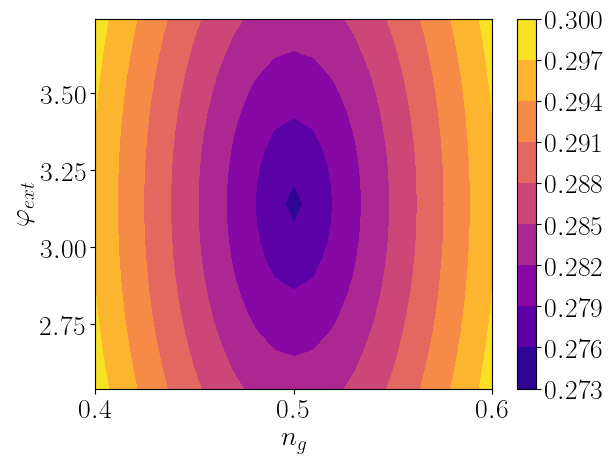

In [ ]:
fig1_2=plt.figure()
plt.contourf(NG,PHI, Energies2_1, cmap="plasma")
plt.axis('auto')
plt.xlabel("$n_g$")
plt.ylabel(r'$\varphi_{ext}$')
plt.colorbar()
#plt.savefig('COLORMAP_E1_N20M20_2.pdf')
plt.show()

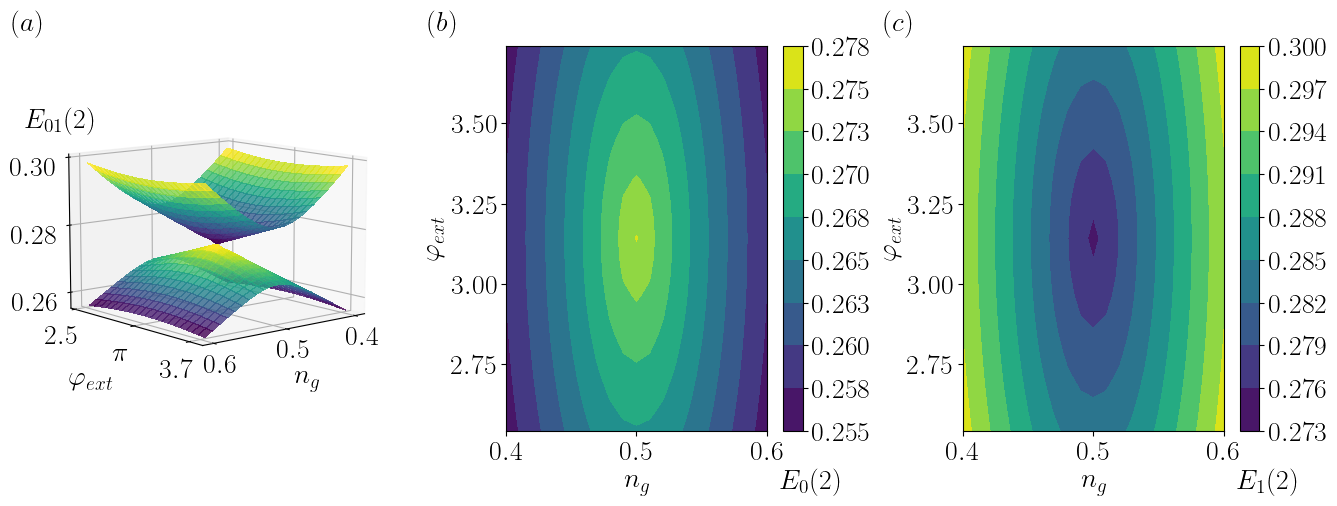

In [ ]:
# Create the figure and subplots
fig = plt.figure(figsize=(16, 5))

# Plot 1: 3D surface plot
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(NG, PHI, Energies2_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surf2 = ax1.plot_surface(NG,PHI, Energies2_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax1.set_xlabel('$n_g$')
#ax1.set_ylabel(r'$\varphi_{ext}$')
#ax1.set_zlabel('$E_{01} (1)$')
ax1.text(0.62,2,0.307,r'$E_{01} (2)$', fontsize=20)
ax1.text(0.47,3.7,0.237,r'$n_g$', fontsize=20)
ax1.text(0.7,3.15,0.242,r'$\varphi_{ext}$', fontsize=20)
ax1.set_xticks([0.4,0.5,0.6],['$0.4$','$0.5$','$0.6$'])
ax1.set_yticks([2.5,np.pi,3.7],['$2.5$','$\pi$','$3.7$'])
ax1.set_zticks([0.26,0.28,0.30],['$0.26$','$0.28$','$0.30$'])
ax1.tick_params(axis='x', pad=-2.0)
ax1.tick_params(axis='y', pad=2.0)
ax1.tick_params(axis='z', pad=7.0)
ax1.text(0.69,2.5,0.3375,r'$(a)$', fontsize=20)
ax1.view_init(10, 50)

# Plot 2: First contour plot
ax2 = fig.add_subplot(132)
contour1 = ax2.contourf(NG, PHI, Energies2_0, cmap="viridis")
plt.axis('tight')
ax2.set_xlabel(r'$n_g$')
ax2.set_ylabel(r'$\varphi_{ext}$')
ax2.text(0.61,2.36,r'$E_0 (2)$', fontsize=20)
ax2.text(0.34,3.79,r'$(b)$', fontsize=20)
colorbar1 = plt.colorbar(contour1, ax=ax2)
#colorbar1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))  # Set 2 decimal places
colorbar1.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.3f$'))

#colorbar1.set_label('$E_0 (2)$')

# Plot 3: Second contour plot
ax3 = fig.add_subplot(133)
contour2 = ax3.contourf(NG, PHI, Energies2_1, cmap="viridis")
plt.axis('tight')
ax3.set_xlabel('$n_g$')
ax3.set_ylabel(r'$\varphi_{ext}$')
ax3.text(0.61,2.36,r'$E_1 (2)$', fontsize=20)
ax3.text(0.34,3.79,r'$(c)$', fontsize=20)
colorbar2 = plt.colorbar(contour2, ax=ax3)
#colorbar2.set_label('$E_1 (2)$')

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.4)

# Show the figure
#plt.savefig('E01_2_DEF_PRUEBA1.png',dpi=300,bbox_inches='tight')
plt.show()

2ND EXCITED STATE & 3RD EXCITED STATE JOINT 3D PLOT AND SEPARATED COLORMAPS (2)

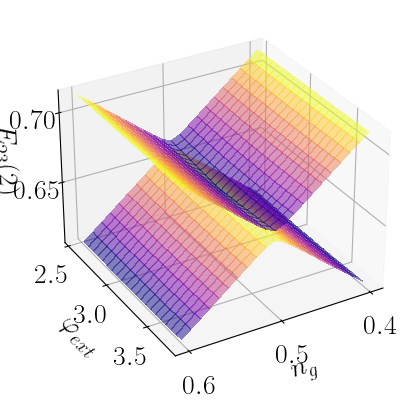

In [ ]:
fig23_2 = plt.figure()
ax23_2 = plt.axes(projection='3d')
ax23_2.plot_surface(NG,PHI, Energies2_2, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)#changing x and y 
ax23_2.plot_surface(NG,PHI, Energies2_3, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)
ax23_2.set_xlabel('$n_g$')
ax23_2.set_ylabel(r'$\varphi_{ext}$')
ax23_2.set_zlabel('$E_{23} (2)$')
# rotation
ax23_2.view_init(30, 60)
#plt.savefig('3D_E23_N20M20_2.pdf',dpi=600)
plt.show()

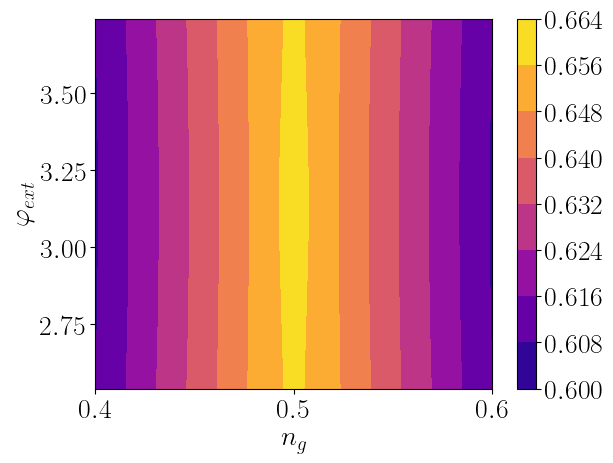

In [ ]:
fig2_2=plt.figure()
plt.contourf(NG,PHI, Energies2_2, cmap="plasma")
plt.axis('auto')
plt.xlabel("$n_g$")
plt.ylabel(r'$\varphi_{ext}$')
plt.colorbar()
#plt.savefig('COLORMAP_E2_N20M20_2.pdf')
plt.show()

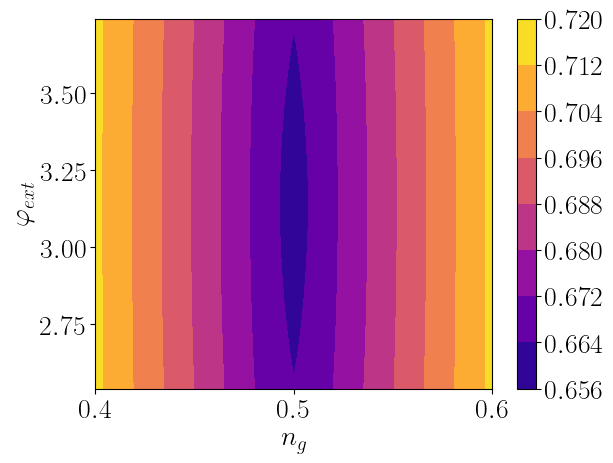

In [ ]:
fig3_2=plt.figure()
plt.contourf(NG,PHI, Energies2_3, cmap="plasma")
plt.axis('auto')
plt.xlabel("$n_g$")
plt.ylabel(r'$\varphi_{ext}$')
plt.colorbar()
#plt.savefig('COLORMAP_E3_N20M20_2.pdf')
plt.show()

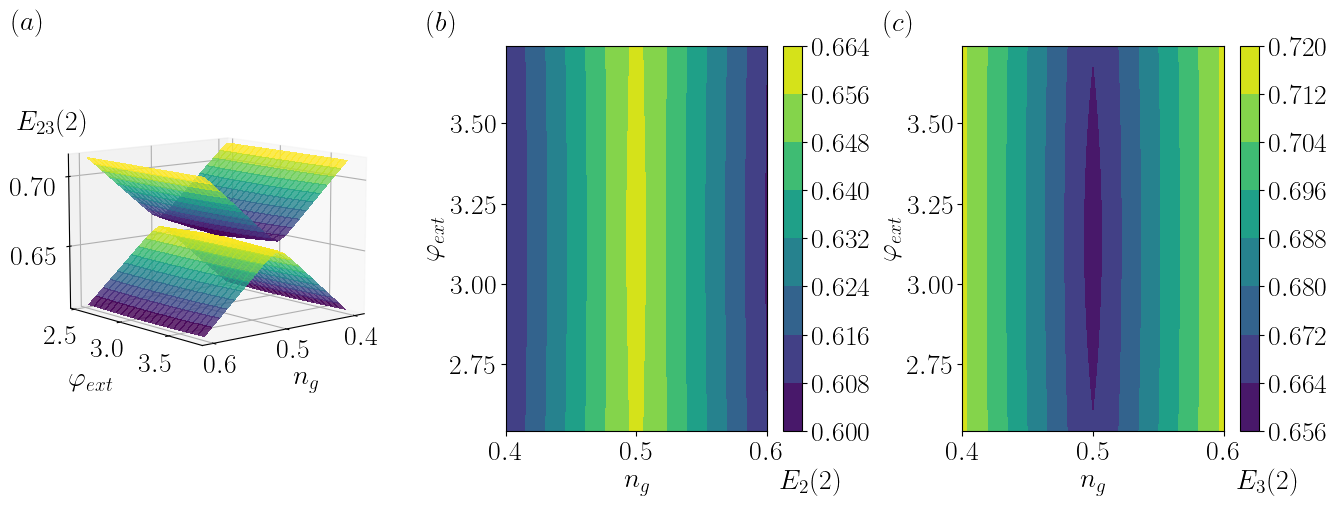

In [ ]:
# Create the figure and subplots
fig3 = plt.figure(figsize=(16, 5))
# Plot 1: 3D surface plot
ax1 = fig3.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(NG, PHI, Energies2_2, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surf2 = ax1.plot_surface(NG,PHI, Energies2_3, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax1.set_xlabel('$n_g$')
#ax1.set_ylabel(r'$\varphi_{ext}$')
#ax1.set_zlabel('$E_{01} (1)$')
ax1.text(0.63,2,0.73,r'$E_{23} (2)$', fontsize=20)
ax1.text(0.47,3.7,0.56,r'$n_g$', fontsize=20)
ax1.text(0.7,3.15,0.572,r'$\varphi_{ext}$', fontsize=20)
#ax1.set_xticks([0.4,0.5,0.6],['$0.4$','$0.5$','$0.6$'])
#ax1.set_yticks([2.5,np.pi,3.7],['$2.5$','$\pi$','$3.7$'])
ax1.set_zticks([0.65,0.70],['$0.65$','$0.70$'])
ax1.tick_params(axis='x', pad=-2.0)
ax1.tick_params(axis='y', pad=2.0)
ax1.tick_params(axis='z', pad=7.0)
ax1.text(0.69,2.5,0.805,r'$(a)$', fontsize=20)
ax1.view_init(10, 50)

# Plot 2: First contour plot
ax2 = fig3.add_subplot(132)
contour1 = ax2.contourf(NG, PHI, Energies2_2, cmap="viridis")
plt.axis('tight')
ax2.set_xlabel(r'$n_g$')
ax2.set_ylabel(r'$\varphi_{ext}$')
ax2.text(0.61,2.36,r'$E_2 (2)$', fontsize=20)
ax2.text(0.34,3.79,r'$(b)$', fontsize=20)
colorbar1 = plt.colorbar(contour1, ax=ax2)
#colorbar1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))  # Set 2 decimal places
colorbar1.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.3f$'))

#colorbar1.set_label('$E_2 (2)$')

# Plot 3: Second contour plot
ax3 = fig3.add_subplot(133)
contour2 = ax3.contourf(NG, PHI, Energies2_3, cmap="viridis")
plt.axis('tight')
ax3.set_xlabel('$n_g$')
ax3.set_ylabel(r'$\varphi_{ext}$')
ax3.text(0.61,2.36,r'$E_3 (2)$', fontsize=20)
ax3.text(0.34,3.79,r'$(c)$', fontsize=20)
colorbar2 = plt.colorbar(contour2, ax=ax3)
#colorbar2.set_label('$E_1 (2)$')

# Adjust the spacing between subplots
fig3.subplots_adjust(wspace=0.4)

# Show the figure
#plt.savefig('E23_2_DEF_PRUEBA1.png',dpi=300,bbox_inches='tight')
plt.show()

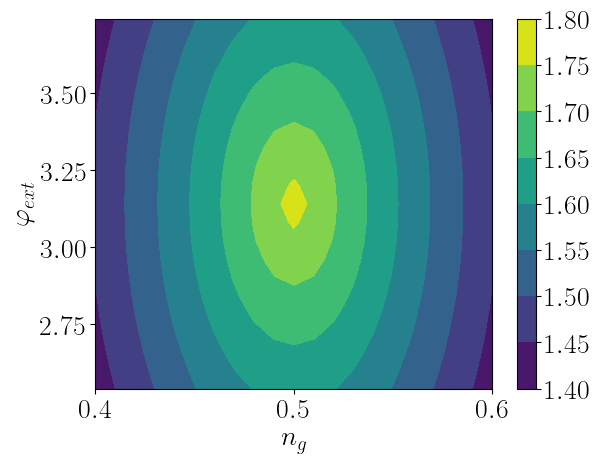

In [ ]:
fig0sdifj=plt.figure()
plt.contourf(NG,PHI, Energies1_0, cmap="viridis")
plt.axis('tight')
plt.xlabel("$n_g$")
plt.ylabel(r'$\varphi_{ext}$')
plt.colorbar()
#plt.savefig('COLORMAP_E0_N20M20.pdf')
plt.show()

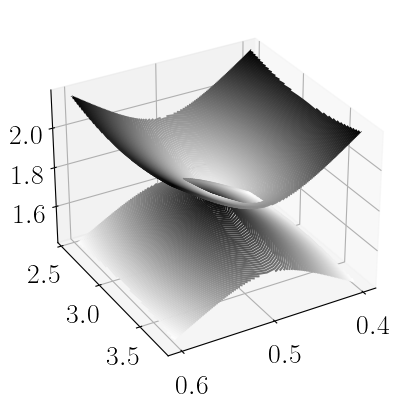

In [24]:
figPRUEBA = plt.figure()
ax3 = plt.axes(projection='3d')
ax3.contour3D(NG, PHI, Energies1_0, 100, cmap='binary')
ax3.contour3D(NG, PHI, Energies1_1, 100, cmap='binary')
ax3.view_init(30, 60)
#plt.savefig('3Dplot2.png',dpi=600)
plt.show()

In [25]:
#for i in ng1:
 #   k=0
  #  for j in phi_ext1:
   #     l=0
    # #   print("Step for ng = ",i,", phi_ext= ",j)
     # #  H1=Hamiltonian_0pi(E_J,E_Cs,E_Cj,E_L,i,j,alpha)
        #print("Hamiltonian built, len(H)=",len(H1)**2)
        #vals,vects=np.linalg.eigh(H)
        #vals, _ = eigsh(H1, k=4, which='SA')
        #vals,_=np.linalg.eigh(H)
        #print(vals[0],vals[1],vals[2],vals[3])
        #print("Eigenvalues calculated")
        #Energies1_0[k][l]+=vals[0]
        #Energies1_1[k][l]+=vals[1]
        #Energies1_2[k][l]+=vals[2]
        #Energies1_3[k][l]+=vals[3]
        #l+=1
    #k+=1
    